# Clasificación de textos con deep learning

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os

os.chdir(r"C:\Users\borja\OneDrive\Documents\C2B\Bootcamp\Módulo 8\Módulo 8\scripts\16.PLN")

df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


Borramos columnas innecesarias

In [4]:
df = df.iloc [:,0:2]

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.columns = ['Target','Email']

In [7]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [8]:
from nltk.corpus import stopwords
from nltk import *
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Eliminamos stopwords de la columna Email

In [9]:
stop = stopwords.words('english')
df['Email'] = df['Email'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [10]:
df

,Target,Email
0,ham,"Go jurong point, crazy.. Available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor... U c already say...
4,ham,"Nah I think goes usf, lives around though"
...,...,...
5567,spam,This 2nd time tried 2 contact u. U å£750 Pound...
5568,ham,Will Ì_ b going esplanade fr home?
5569,ham,"Pity, * mood that. So...any suggestions?"
5570,ham,The guy bitching I acted like i'd interested b...


Eliminamos símbolos puntuación y convertimos a minúsculas...

In [11]:
df['Email'] = df['Email'].apply(lambda x: re.sub('[!@#$:).;,?&]',' ', x.lower()))

In [12]:
df

,Target,Email
0,ham,go jurong point crazy available bugis n gre...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah i think goes usf lives around though
...,...,...
5567,spam,this 2nd time tried 2 contact u u å£750 pound...
5568,ham,will ì_ b going esplanade fr home
5569,ham,pity * mood that so any suggestions
5570,ham,the guy bitching i acted like i'd interested b...


In [13]:
df['Email'] = df['Email'].apply(lambda x:  re.sub('[áéíóúå]','', x))

In [14]:
df

,Target,Email
0,ham,go jurong point crazy available bugis n gre...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah i think goes usf lives around though
...,...,...
5567,spam,this 2nd time tried 2 contact u u £750 pound ...
5568,ham,will ì_ b going esplanade fr home
5569,ham,pity * mood that so any suggestions
5570,ham,the guy bitching i acted like i'd interested b...


Separamos los datos de la variable clase

In [15]:
df2=df[['Email', 'Target']]

Dividimos los datos en train y test en una proporción de 80:20

In [16]:
train, test = train_test_split(df2, 
                               test_size=0.2,
                               random_state = 123)

Definimos las variables longuitud máxima de la sentencia y las n palabras más frecuentes

In [17]:
long_max_sentencia = 300
num_palabras = 20000

Keras nos permite usar Redes Neuronales con datos de texto.
Para ello necesitamos que los datos de entrada, estén codificados, de manera que cada palabra esté representada como un número entero único.

In [18]:
from keras.preprocessing.text import Tokenizer

# Tokenizamos las 20000 palabras más frecuentes
tokenizer = Tokenizer(num_palabras)

# Creamos un índice de vocabulario basado en la frecuencia de las palabras
tokenizer.fit_on_texts(train.Email)

# Transformamos cada texto en los textos en una secuencia de números.
# Básicamente cogemos cada palabra y la sustitímos por el valor entero
# generado en fit_on_texts
train_sequences = tokenizer.texts_to_sequences(train.Email)
test_sequences = tokenizer.texts_to_sequences(test.Email)

In [19]:
tokenizer.index_word 

{1: 'i',
 2: 'u',
 3: 'call',
 4: '2',
 5: 'you',
 6: "i'm",
 7: 'ur',
 8: 'get',
 9: 'now',
 10: '4',
 11: 'gt',
 12: 'lt',
 13: 'free',
 14: 'go',
 15: 'ok',
 16: 'know',
 17: 'like',
 18: 'me',
 19: 'come',
 20: 'no',
 21: 'got',
 22: 'good',
 23: 'it',
 24: 'time',
 25: 'send',
 26: 'day',
 27: 'love',
 28: 'text',
 29: 'txt',
 30: 'want',
 31: 'going',
 32: 'home',
 33: 'stop',
 34: 'so',
 35: 'sorry',
 36: 'one',
 37: 'do',
 38: "i'll",
 39: 'see',
 40: 'lor',
 41: 'still',
 42: 'how',
 43: 'need',
 44: 'if',
 45: 'r',
 46: 'da',
 47: 'reply',
 48: 'back',
 49: 'tell',
 50: 'n',
 51: 'dont',
 52: 'k',
 53: 'but',
 54: 'today',
 55: 'mobile',
 56: 'just',
 57: 'take',
 58: 'pls',
 59: 'new',
 60: 'later',
 61: 'we',
 62: 'the',
 63: 'please',
 64: 'hi',
 65: 'think',
 66: 'my',
 67: 'this',
 68: 'dear',
 69: 'ì',
 70: 'oh',
 71: 'night',
 72: 'claim',
 73: 'and',
 74: 'phone',
 75: '1',
 76: 'what',
 77: 'week',
 78: 'to',
 79: 'great',
 80: 'well',
 81: 'is',
 82: 'much',
 83: 'y

In [20]:
train_sequences [0:5]

[[23, 571, 762, 3854, 100, 2552],
 [80,
  368,
  3855,
  3856,
  199,
  905,
  536,
  19,
  537,
  905,
  6,
  996,
  3857,
  87,
  537,
  82,
  3858,
  200,
  39,
  6,
  3859],
 [95, 209, 34, 118],
 [133,
  83,
  55,
  101,
  398,
  538,
  601,
  826,
  99,
  369,
  1097,
  906,
  67,
  387,
  484,
  370,
  5,
  3,
  3860,
  907,
  292,
  3861,
  348],
 [1654, 35, 40, 1, 349, 308, 349, 350, 4, 275, 74]]

In [21]:
# Creamos un diccionario que contenga las palabras y su índice (el opuesto a index_word)
word_index = tokenizer.word_index
print('Tenemos %s tokens únicos.' % len(word_index))

Tenemos 7890 tokens únicos.


In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# con pad_sequences conseguimos que todas las secuencias de datos tengan la misma longuitud
train_data = pad_sequences(train_sequences, maxlen=long_max_sentencia)
test_data = pad_sequences(test_sequences, maxlen=long_max_sentencia)

In [23]:
print(train_data.shape)
print(test_data.shape)

(4457, 300)
(1115, 300)


In [24]:
train_labels = train['Target']
test_labels = test['Target']

In [25]:
train_labels.tail()

5218    ham
4060    ham
1346    ham
3454    ham
3582    ham
Name: Target, dtype: object

In [26]:
train_labels.shape

(4457,)

In [27]:
from sklearn.preprocessing import LabelEncoder

Convertimos la matriz de caracteres en un matriz numérica.  Asignamos los niveles a etiquetas únicas.  (Similar a OneHot Encoding)

In [28]:
le = LabelEncoder()
le.fit(train_labels)
train_labels = le.transform(train_labels)
test_labels = le.transform(test_labels)

In [29]:
# Vemos el total de elementos de cada clase existentes en los set de datos
print(le.classes_)
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

['ham' 'spam']
(array([0, 1]), array([3843,  614], dtype=int64))
(array([0, 1]), array([982, 133], dtype=int64))


Convertimos los vectores train_labels y test_labels en una matriz binaria

In [30]:
from tensorflow.keras.utils import to_categorical

labels_train = to_categorical(np.asarray(train_labels))
labels_test = to_categorical(np.asarray(test_labels))
print('Dimensiones del tensor con los datos de entrenamiento:', train_data.shape)
print('Dimensiones del tensor con las etiquetas de entrenamiento:', labels_train.shape)
print('Dimensiones del tensor con los datos de test:', test_data.shape)
print('Dimensiones del tensor con las etiquetas de test:', labels_test.shape)

Dimensiones del tensor con los datos de entrenamiento: (4457, 300)
Dimensiones del tensor con las etiquetas de entrenamiento: (4457, 2)
Dimensiones del tensor con los datos de test: (1115, 300)
Dimensiones del tensor con las etiquetas de test: (1115, 2)


In [31]:
train_data[0:10]

array([[   0,    0,    0, ..., 3854,  100, 2552],
       [   0,    0,    0, ...,   39,    6, 3859],
       [   0,    0,    0, ...,  209,   34,  118],
       ...,
       [   0,    0,    0, ...,  827,    4,   19],
       [   0,    0,    0, ..., 1655,   17,   15],
       [   0,    0,    0, ..., 2553,  416, 1996]])

In [32]:
labels_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [33]:
test_data[0:10]

array([[   0,    0,    0, ...,   22,   20, 4380],
       [   0,    0,    0, ..., 1287, 2824,  208],
       [   0,    0,    0, ...,    1,   65,    2],
       ...,
       [   0,    0,    0, ...,  294,  312,  105],
       [   0,    0,    0, ...,  274,   12,   11],
       [   0,    0,    0, ...,   12,   11,    4]])

In [34]:
labels_test

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

Podemos entrenar un modelo en Keras para que acepte texto codificado como lo hemos hecho, a través de una capa **Embedding** (incrustación).
Se trata de una capa flexible que puede utilizarse de diversas maneras:

* Se puede utilizar sola para aprender una incrustación de palabras que se puede guardar y utilizar en otro modelo más adelante.
* Puede utilizarse como parte de un modelo de aprendizaje profundo en el que la incrustación se aprende junto con el propio modelo.
* Puede utilizarse para cargar un modelo de incrustación de palabras preentrenado, un tipo de aprendizaje por transferencia.

La capa de incrustación se define como la primera capa oculta de una red. Debe especificar 3 argumentos:

* **input_dim**: Es el tamaño del vocabulario en los datos de texto. Por ejemplo, si los datos están codificados en números enteros con valores entre 0 y 10, el tamaño del vocabulario sería de 11 palabras.
* **output_dim**: Es el tamaño del espacio vectorial en el que se incrustarán las palabras. Define el tamaño de los vectores de salida de esta capa para cada palabra. Por ejemplo, puede ser 32 o 100 o incluso más grande. Aquí tenemos que probar diferentes valores para resolver el problema.
* **input_length**: Esta es la longitud de las secuencias de entrada. Por ejemplo, si todos los documentos de entrada están compuestos por 1000 palabras, ésto sería 1000.

In [35]:
tamanio_incrustacion = 100
print(long_max_sentencia)

300


# Modelado y predicción

## Clasificador con una Red Neuronal Convolucional

In [37]:
import sys, os, re, csv, codecs
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Flatten, Dropout, BatchNormalization
from keras.layers import MaxPooling1D, Embedding

In [38]:
# Generamos la semilla
import random
from numpy.random import seed
import tensorflow as tf
tf.random.set_seed(123)
np.random.seed(123)
random.seed(123)
seed(123)

RMSprop es útil cuando se requiere entrenar una red neuronal profunda con muchos parámetros. En comparación con otros algoritmos de optimización como el Descenso de Gradiente Estocástico (SGD), RMSprop adapta la tasa de aprendizaje para cada parámetro de forma individual. De esta manera, los parámetros que reciben gradientes más grandes tendrán una tasa de aprendizaje más pequeña, lo que ayuda a evitar la divergencia y a mejorar la convergencia del modelo.

Además, RMSprop es eficaz para resolver el problema de desvanecimiento (desaparición) de gradiente, que es común en redes neuronales profundas con muchas capas. RMSprop adapta la tasa de aprendizaje para cada parámetro en función de la magnitud del gradiente reciente, lo que significa que los parámetros que reciben gradientes pequeños tendrán una tasa de aprendizaje mayor. Esto ayuda a evitar que la tasa de aprendizaje sea demasiado pequeña en capas profundas, lo que puede provocar el problema de desaparición de gradiente.

En resumen, se recomienda utilizar RMSprop cuando se trabaja con datos con gradientes de gran magnitud o cuando se quiere acelerar el proceso de entrenamiento de redes neuronales profundas con muchas capas. Sin embargo, es importante experimentar con diferentes algoritmos de optimización y ajustar los parámetros para encontrar el mejor modelo para su problema específico.

In [39]:
model = Sequential()
model.add(Embedding(num_palabras, tamanio_incrustacion, input_length=long_max_sentencia))
model.add(BatchNormalization()) # estandarizamos los datos
model.add(Dropout(0.5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))  # Permite reducir el tamaño el tamaño del tensor en 5.  
                            # Si el tensor tiene 100 elementos, devolvería un tensor de 20 elementos
model.add(Dropout(0.5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [40]:
from keras.callbacks import TensorBoard


tf.random.set_seed(123)
np.random.seed(123)
random.seed(123)
seed(123)

# para gpu
#tensorboard_cb = TensorBoard(os.getcwd())
model.fit(train_data, 
          labels_train,
          batch_size=64,
          epochs=5,
          validation_data=(test_data, labels_test),
          # para gpu
          #callbacks=[tensorboard_cb]
          )

Epoch 1/5
70/70 [==============================] - 12s 131ms/step - loss: 0.3635 - acc: 0.8562 - val_loss: 0.4826 - val_acc: 0.8807
Epoch 2/5
70/70 [==============================] - 8s 120ms/step - loss: 0.2279 - acc: 0.9089 - val_loss: 0.4284 - val_acc: 0.8951
Epoch 3/5
70/70 [==============================] - 9s 123ms/step - loss: 0.1023 - acc: 0.9690 - val_loss: 0.3238 - val_acc: 0.9507
Epoch 4/5
70/70 [==============================] - 9s 124ms/step - loss: 0.0627 - acc: 0.9816 - val_loss: 0.2088 - val_acc: 0.9516
Epoch 5/5
70/70 [==============================] - 9s 128ms/step - loss: 0.0485 - acc: 0.9863 - val_loss: 0.1904 - val_acc: 0.9256


In [41]:
prediccion1=model.predict(test_data)
prediccion1

35/35 [==============================] - 1s 19ms/step


array([[0.9821383 , 0.01786171],
       [0.22446549, 0.7755345 ],
       [0.98881835, 0.01118163],
       ...,
       [0.9884101 , 0.01158986],
       [0.9838643 , 0.01613572],
       [0.9822927 , 0.01770725]], dtype=float32)

### Evaluamos...

In [42]:
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score 
precision, recall, fscore, support = score(labels_test, prediccion1.round())
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print("############################")
print(sklearn.metrics.classification_report(labels_test,prediccion1.round()))

precision: [0.92206573 1.        ]
recall: [1.         0.37593985]
fscore: [0.95945286 0.54644809]
support: [982 133]
############################
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       982
           1       1.00      0.38      0.55       133

   micro avg       0.93      0.93      0.93      1115
   macro avg       0.96      0.69      0.75      1115
weighted avg       0.93      0.93      0.91      1115
 samples avg       0.93      0.93      0.93      1115



## Clasificador con una Red Neuronal Recurrente

In [43]:
#from keras.layers.recurrent import SimpleRNN
from tensorflow.keras.layers import SimpleRNN

Añadimos una capa SimpleRNN con dos unidades (neuronas) y una entrada de forma (None, 1), lo que significa que puede recibir una secuencia de entrada de longitud variable (marcada como None) con una dimensión de 1.

En otras palabras, si se está trabajando con datos secuenciales, texto en este caso, cada muestra puede tener una longitud variable, y la dimensión de la característica de cada muestra es 1.

La capa SimpleRNN realiza una operación de retroalimentación de estado, lo que significa que el estado de la capa en el paso de tiempo anterior se retroalimenta como entrada en el siguiente paso de tiempo (la letra anterior retroalimenta la siguiente). Esto permite que la capa capture patrones de largo alcance en los datos secuenciales.

Al agregar una capa SimpleRNN al modelo secuencial, se está agregando una capa de procesamiento adicional que puede ayudar a mejorar el rendimiento del modelo al capturar patrones de largo alcance en los datos secuenciales.

In [44]:
tf.random.set_seed(123)
np.random.seed(123)
random.seed(123)
seed(123)

In [45]:
model = Sequential()
model.add(Embedding(num_palabras, tamanio_incrustacion, input_length=long_max_sentencia))
model.add(SimpleRNN(2, input_shape=(None,1)))  
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [48]:
# para gpu
tensorboard_cb = TensorBoard()

model.fit(train_data, 
          labels_train,
          batch_size=16,
          epochs=5,
          validation_data=(test_data, labels_test),
          # para gpu
          )

Epoch 1/5
279/279 [==============================] - 27s 95ms/step - loss: 0.3049 - accuracy: 0.9574 - val_loss: 0.3067 - val_accuracy: 0.9318
Epoch 2/5
279/279 [==============================] - 26s 93ms/step - loss: 0.1824 - accuracy: 0.9809 - val_loss: 0.2582 - val_accuracy: 0.9318
Epoch 3/5
279/279 [==============================] - 26s 92ms/step - loss: 0.1180 - accuracy: 0.9904 - val_loss: 0.2423 - val_accuracy: 0.9309
Epoch 4/5
279/279 [==============================] - 26s 93ms/step - loss: 0.0820 - accuracy: 0.9946 - val_loss: 0.2242 - val_accuracy: 0.9291
Epoch 5/5
279/279 [==============================] - 25s 89ms/step - loss: 0.0597 - accuracy: 0.9966 - val_loss: 0.2215 - val_accuracy: 0.9211


In [49]:
prediccion_Srnn=model.predict(test_data)
prediccion_Srnn

35/35 [==============================] - 1s 22ms/step


array([[0.9850965 , 0.01490351],
       [0.00696295, 0.99303705],
       [0.9985846 , 0.00141537],
       ...,
       [0.91971284, 0.08028712],
       [0.9987777 , 0.00122227],
       [0.99786645, 0.00213355]], dtype=float32)

### Evaluamos...

In [50]:
precision, recall, fscore, support = score(labels_test, prediccion_Srnn.round())

In [51]:
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print("############################")
print(sklearn.metrics.classification_report(labels_test, prediccion_Srnn.round()))

precision: [0.94610778 0.69911504]
recall: [0.96537678 0.59398496]
fscore: [0.95564516 0.64227642]
support: [982 133]
############################
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       982
           1       0.70      0.59      0.64       133

   micro avg       0.92      0.92      0.92      1115
   macro avg       0.82      0.78      0.80      1115
weighted avg       0.92      0.92      0.92      1115
 samples avg       0.92      0.92      0.92      1115



## Clasificador con una Red Neuronal LSTM (LongShort-Term Memory)

Las LSTM son un tipo especial de redes recurrentes. La característica principal de las redes recurrentes es que la información puede persistir introduciendo bucles en el diagrama de la red, por lo que, básicamente, pueden «recordar» estados previos y utilizar esta información para decidir cuál será el siguiente. Esta característica las hace muy adecuadas para manejar series cronológicas. Mientras las redes recurrentes estándar pueden modelar dependencias a corto plazo (es decir, relaciones cercanas en la serie cronológica), las LSTM pueden aprender dependencias largas, por lo que se podría decir que tienen una «memoria» a más largo plazo.

En el campo del internet de las cosas (IoT), el mantenimiento predictivo es otro ámbito en el que los datos de serie cronológica son muy importantes. Entre otros temas, el mantenimiento predictivo incluye la gestión de averías: predicción, clasificación y diagnóstico. Una rutina de mantenimiento predictivo para un dispositivo o conjunto de dispositivos determinados (ordenadores, generadores eléctricos, máquinas de fabricación, etc.) registra una serie de lecturas de datos a lo largo del tiempo y utiliza estos datos para hallar patrones que sirvan para predecir averías o comportamientos anómalos. Esta predicción se puede utilizar para activar medidas correctivas y así evitar efectos indeseados en el sistema.

In [52]:
tf.random.set_seed(123)
np.random.seed(123)
random.seed(123)
seed(123)

In [54]:
model = Sequential()
model.add(Embedding(num_palabras, tamanio_incrustacion, input_length=long_max_sentencia))
# para usar con cpu
# model.add(LSTM(16, activation='relu', return_sequences=True))
# para usar con gpu

# La capa LSTM tiene 16 unidades (neuronas) y utiliza la función de activación tanh. 
# Además, la capa está configurada con unroll=True, lo que significa que se desenrolla en 
# tiempo de ejecución para acelerar el proceso de entrenamiento. 
# También se establece return_sequences=True, lo que significa que la capa LSTM 
# devuelve una secuencia de salida completa en lugar de solo la última salida.
model.add(LSTM(16, activation='tanh', unroll=True, return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])



model.fit(train_data, 
          labels_train,
          batch_size=16,
          epochs=5,
          validation_data=(test_data, labels_test),
          )

Epoch 1/5
279/279 [==============================] - 136s 184ms/step - loss: 0.1306 - accuracy: 0.9554 - val_loss: 0.3362 - val_accuracy: 0.9874
Epoch 2/5
279/279 [==============================] - 32s 115ms/step - loss: 0.0144 - accuracy: 0.9962 - val_loss: 0.0455 - val_accuracy: 0.9865
Epoch 3/5
279/279 [==============================] - 31s 110ms/step - loss: 0.0030 - accuracy: 0.9989 - val_loss: 0.0420 - val_accuracy: 0.9892
Epoch 4/5
279/279 [==============================] - 31s 113ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0494 - val_accuracy: 0.9848
Epoch 5/5
279/279 [==============================] - 31s 110ms/step - loss: 3.6943e-04 - accuracy: 1.0000 - val_loss: 0.0688 - val_accuracy: 0.9883


In [55]:
prediccion_lstm=model.predict(test_data)
prediccion_lstm

35/35 [==============================] - 12s 51ms/step


array([[1.0000000e+00, 1.2522966e-08],
       [1.4024110e-13, 1.0000000e+00],
       [1.0000000e+00, 2.0228053e-18],
       ...,
       [1.0000000e+00, 4.1739463e-18],
       [1.0000000e+00, 5.3093402e-12],
       [9.9999988e-01, 9.2243184e-08]], dtype=float32)

### Evaluamos...

In [56]:
precision, recall, fscore, support = score(labels_test, prediccion_lstm.round())
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print("############################")
print(sklearn.metrics.classification_report(labels_test, prediccion_lstm.round()))

precision: [0.98693467 1.        ]
recall: [1.         0.90225564]
fscore: [0.99342438 0.9486166 ]
support: [982 133]
############################
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       982
           1       1.00      0.90      0.95       133

   micro avg       0.99      0.99      0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115
 samples avg       0.99      0.99      0.99      1115



## Clasificación con Red Neuronal Bidireccional LSTM

En las LSTM bidireccionales, las entradas se alimentan de dos maneras: una
anterior al futuro y la otra va hacia atrás del futuro al
pasado, lo que ayuda a aprender también la representación del futuro. Bidireccional
Los LSTMs bidireccionales son conocidos por producir muy buenos resultados ya que son capaces de
comprender mejor el contexto.

Este tipo de redes, permiten correlacionar no sólo los datos pasados, sino también los futuros.

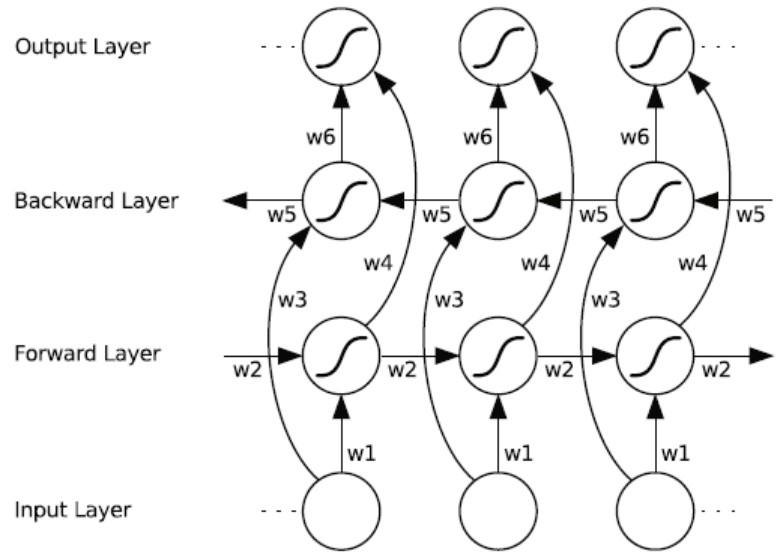

In [57]:
tf.random.set_seed(123)
np.random.seed(123)
random.seed(123)
seed(123)

In [60]:
model = Sequential()
model.add(Embedding(num_palabras,tamanio_incrustacion,input_length=long_max_sentencia))

# para gpu
# model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=0.1, recurrent_dropout=0.1)))

# para cpu
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=0.1, recurrent_dropout=0)))
model.add(Conv1D(16, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform"))
model.add(GlobalMaxPool1D())
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])



model.fit(train_data, 
          labels_train,
          batch_size=16,
          epochs=3,
          validation_data=(test_data, labels_test),
          )

Epoch 1/3
279/279 [==============================] - 62s 197ms/step - loss: 0.1637 - accuracy: 0.9414 - val_loss: 0.0333 - val_accuracy: 0.9892
Epoch 2/3
279/279 [==============================] - 53s 191ms/step - loss: 0.0169 - accuracy: 0.9953 - val_loss: 0.0441 - val_accuracy: 0.9883
Epoch 3/3
279/279 [==============================] - 53s 190ms/step - loss: 0.0045 - accuracy: 0.9984 - val_loss: 0.0464 - val_accuracy: 0.9865


In [61]:
prediccion_blstm=model.predict(test_data)
prediccion_blstm

35/35 [==============================] - 4s 49ms/step


array([[1.0000000e+00, 3.2089456e-09],
       [2.6062939e-12, 1.0000000e+00],
       [1.0000000e+00, 1.0427791e-11],
       ...,
       [1.0000000e+00, 2.6443825e-10],
       [1.0000000e+00, 4.3780850e-09],
       [1.0000000e+00, 3.1073661e-08]], dtype=float32)

In [62]:
precision, recall, fscore, support = score(labels_test, prediccion_blstm.round())
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print("############################")
print(sklearn.metrics.classification_report(labels_test, prediccion_blstm.round()))

precision: [0.98592965 0.99166667]
recall: [0.99898167 0.89473684]
fscore: [0.99241275 0.94071146]
support: [982 133]
############################
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       982
           1       0.99      0.89      0.94       133

   micro avg       0.99      0.99      0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115
 samples avg       0.99      0.99      0.99      1115

